# Exploratory Data Analysis

In [65]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector

In [66]:
# connect to mysql 
import mysql.connector
connection = mysql.connector.connect(
    host='localhost',
    user='root',
    password='markcelemen1',
    database='superstore_sales'
)
cursor = connection.cursor() 
cursor

In [67]:
superstore_df = pd.read_csv("cleaned_superstore.csv")
superstore_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 29 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   row_id            9994 non-null   int64  
 1   order_id          9994 non-null   object 
 2   order_date        9994 non-null   object 
 3   ship_date         9994 non-null   object 
 4   ship_mode         9994 non-null   object 
 5   customer_id       9994 non-null   object 
 6   customer_name     9994 non-null   object 
 7   segment           9994 non-null   object 
 8   country           9994 non-null   object 
 9   city              9994 non-null   object 
 10  state             9994 non-null   object 
 11  postal_code       9994 non-null   int64  
 12  region            9994 non-null   object 
 13  product_id        9994 non-null   object 
 14  category          9994 non-null   object 
 15  sub_category      9994 non-null   object 
 16  product_name      9994 non-null   object 


In [68]:
superstore_df.head()

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,city,...,discount,profit,profit_margin,discounted_sales,order_year,order_month,order_day,ship_year,ship_month,ship_day
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,0.00,41.9136,0.1600,261.9600,2016,11,8,2016,11,11
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,0.00,219.5820,0.3000,731.9400,2016,11,8,2016,11,11
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,0.00,6.8714,0.4700,14.6200,2016,6,12,2016,6,16
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,0.45,-383.0310,-0.4000,526.6676,2015,10,11,2015,10,18
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,0.20,2.5164,0.1125,17.8944,2015,10,11,2015,10,18


In [69]:
superstore_df.describe()

,row_id,postal_code,sales,quantity,discount,profit,profit_margin,discounted_sales,order_year,order_month,order_day,ship_year,ship_month,ship_day
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896,0.120314,197.580421,2015.722233,7.809686,15.468481,2015.737442,7.743146,15.883730
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108,0.466754,539.045279,1.123555,3.284654,8.748327,1.126141,3.340476,8.802677
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000,-2.750000,0.088800,2014.000000,1.000000,1.000000,2014.000000,1.000000,1.000000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750,0.075000,14.336000,2015.000000,5.000000,8.000000,2015.000000,5.000000,8.000000
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500,0.270000,45.923200,2016.000000,9.000000,15.000000,2016.000000,9.000000,16.000000
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000,0.362500,180.176475,2017.000000,11.000000,23.000000,2017.000000,11.000000,24.000000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000,0.500000,17499.950000,2017.000000,12.000000,31.000000,2018.000000,12.000000,31.000000


## Customer Analysis

Demographic Distribution: Examine how customers are distributed across regions, states, and cities to identify key markets

In [121]:
query = '''
SELECT region, state, city, COUNT(customer_key) AS total_customers
FROM customer
GROUP BY region, state, city
ORDER BY total_customers DESC
'''
cursor.execute(query)

In [122]:
results = cursor.fetchall()
df = pd.DataFrame(results, columns=['region', 'state', 'city', 'total_customers'])

df.head()

,region,state,city,total_customers
0,East,New York,New York City,68
1,West,California,Los Angeles,58
2,East,Pennsylvania,Philadelphia,46
3,West,California,San Francisco,41
4,West,Washington,Seattle,31


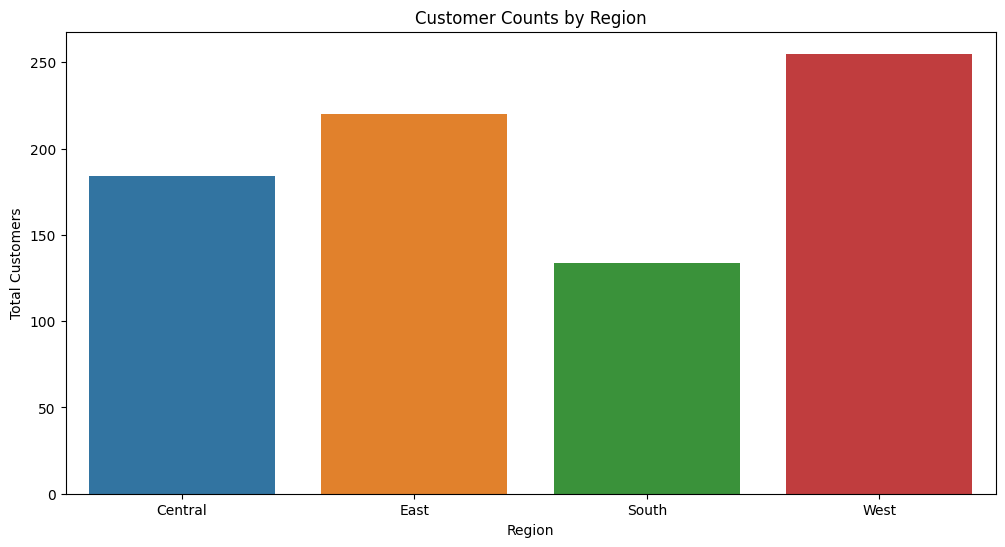

In [123]:
# region-level
region_df = df.groupby('region')['total_customers'].sum().reset_index()

plt.figure(figsize=(12,6))
sns.barplot(data=region_df, x='region', y='total_customers', hue='region', legend=False)

plt.title('Customer Counts by Region')
plt.xlabel('Region')
plt.ylabel('Total Customers')
plt.show()

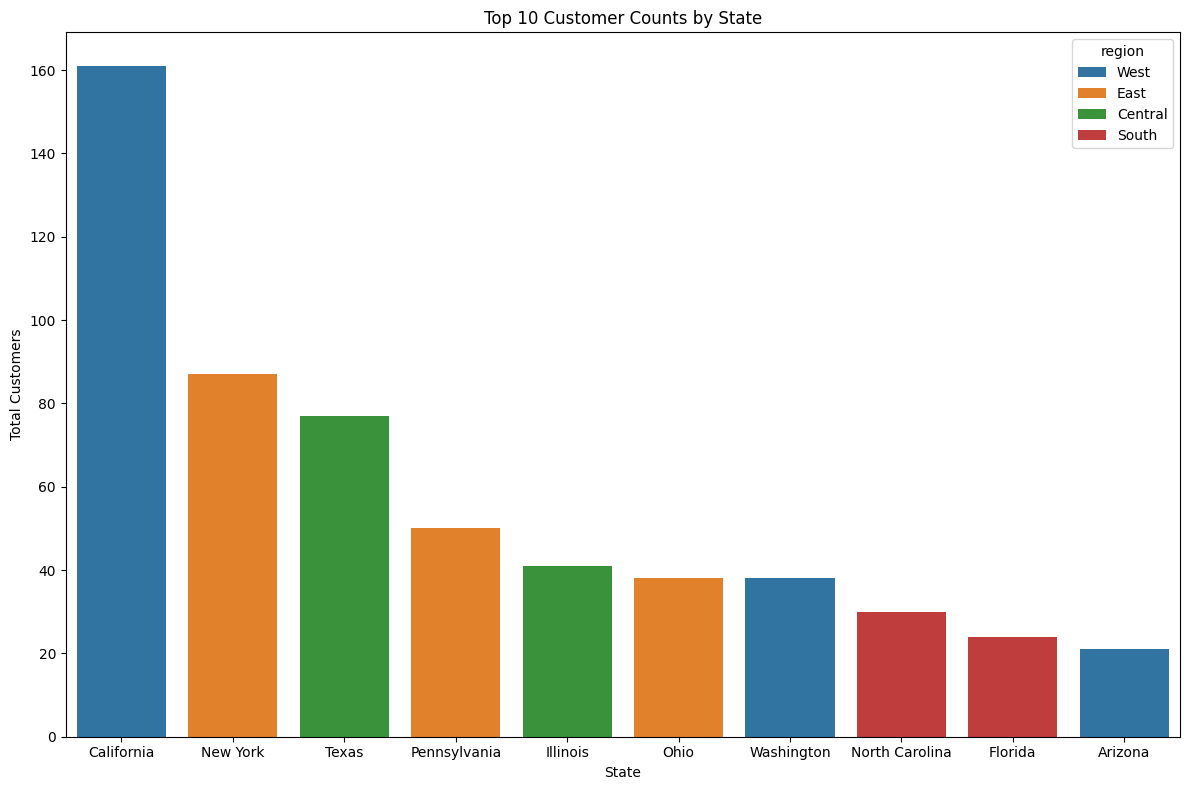

In [124]:
# state-level / top 10
state_df = df.groupby(['state', 'region'])['total_customers'].sum().reset_index()
top_states = state_df.nlargest(10, 'total_customers')

plt.figure(figsize=(12, 8))
sns.barplot(data=top_states, x='state', y='total_customers', hue='region')

plt.title('Top 10 Customer Counts by State')
plt.xlabel('State')
plt.ylabel('Total Customers')
plt.tight_layout()
plt.show()

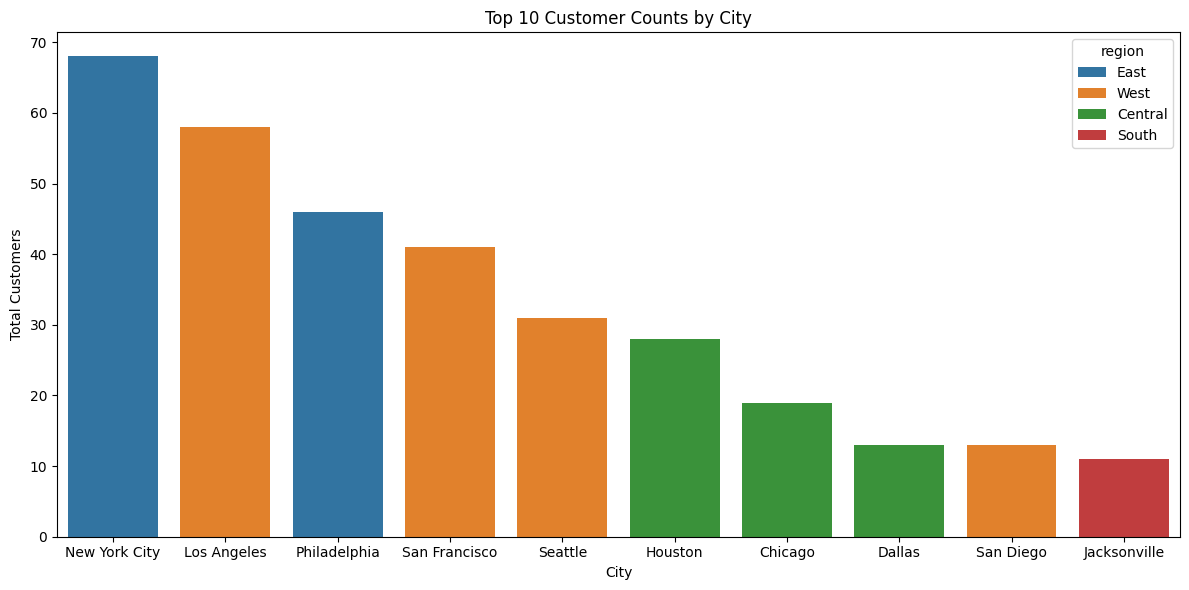

In [125]:
# city-level / top 10
city_df = df.groupby(['city', 'region'])['total_customers'].sum().reset_index()
top_cities = city_df.nlargest(10, 'total_customers')

plt.figure(figsize=(12, 6))
sns.barplot(data=top_cities, x='city', y='total_customers', hue='region')

plt.title('Top 10 Customer Counts by City')
plt.xlabel('City')
plt.ylabel('Total Customers')
plt.tight_layout()
plt.show()

Segment Performance: Evaluate sales, profit, and quantity by customer segment to understand which segments contribute most

In [126]:
query = '''
SELECT c.segment, SUM(s.sales) AS total_sales, SUM(s.profit) AS total_profit, SUM(s.quantity) AS total_quantity
FROM customer c
    JOIN orders o ON c.customer_key = o.customer_key
    JOIN sales s ON o.order_key = s.order_key
GROUP BY c.segment
ORDER BY total_sales DESC
'''

cursor.execute(query)

In [127]:
results = cursor.fetchall()
df = pd.DataFrame(results, columns=['segment', 'total_sales', 'total_profit', 'total_count'])

df.head()

,segment,total_sales,total_profit,total_count
0,Consumer,1161401.3450,134119.2092,19521
1,Corporate,706146.3668,91979.1340,11608
2,Home Office,429653.1485,60298.6785,6744


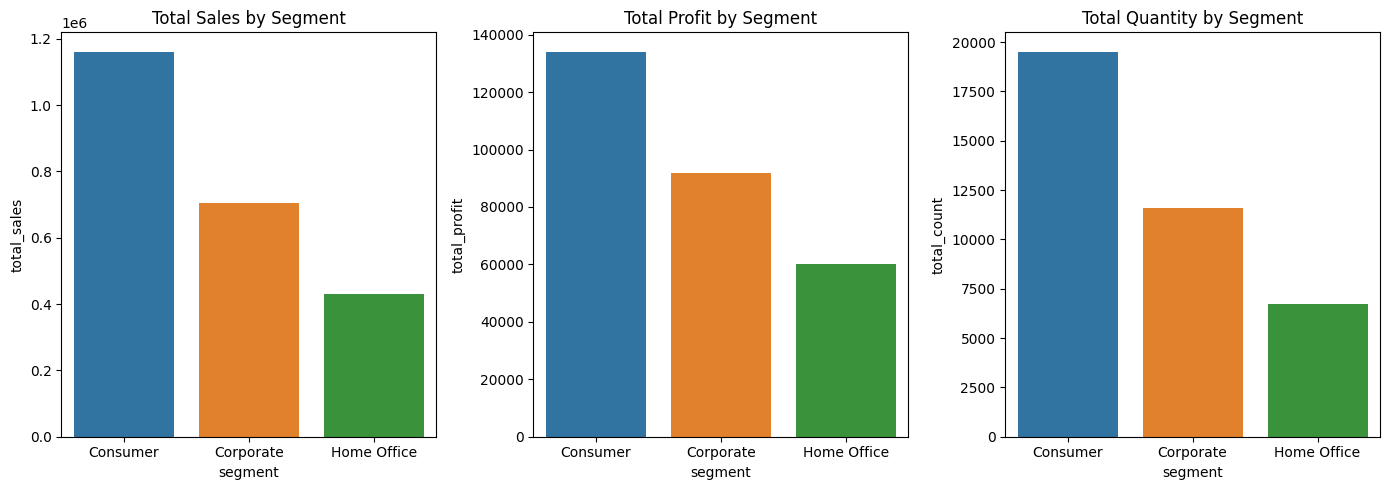

In [128]:
fig, axes = plt.subplots(1,3, figsize=(14,5))

sns.barplot(ax=axes[0], data=df, x='segment', y='total_sales', hue='segment', legend=False)
axes[0].set_title('Total Sales by Segment')

sns.barplot(ax=axes[1], data=df, x='segment', y='total_profit', hue='segment', legend=False)
axes[1].set_title('Total Profit by Segment')

sns.barplot(ax=axes[2], data=df, x='segment', y='total_count', hue='segment', legend=False)
axes[2].set_title('Total Quantity by Segment')
plt.tight_layout()
plt.show()

Geographic Insights: Analyze sales, profit, and quantity by region, state, and city for location-based performance trends

In [129]:
query = '''
SELECT c.region, c.state, c.city, SUM(s.sales) AS total_sales, SUM(s.profit) AS total_profit, SUM(s.quantity) AS total_quantity
FROM customer c
    JOIN orders o ON c.customer_key = o.customer_key
    JOIN sales s ON o.order_key = s.order_key
GROUP BY c.region, c.state, c.city
ORDER BY total_sales DESC, total_profit DESC, total_quantity DESC
'''
cursor.execute(query)

In [130]:
results = cursor.fetchall()
df = pd.DataFrame(results, columns=['region', 'state', 'city', 'total_sales', 'total_profit', 'total_quantity'])

df.head()

# no visuals will be created for city

,region,state,city,total_sales,total_profit,total_quantity
0,East,New York,New York City,210926.9921,41892.8872,3217
1,West,California,Los Angeles,141770.8106,11113.7756,2756
2,East,Pennsylvania,Philadelphia,130921.1550,12376.6486,2299
3,West,Washington,Seattle,108638.2118,19979.9074,1371
4,West,California,San Francisco,107084.0535,17141.7985,1773


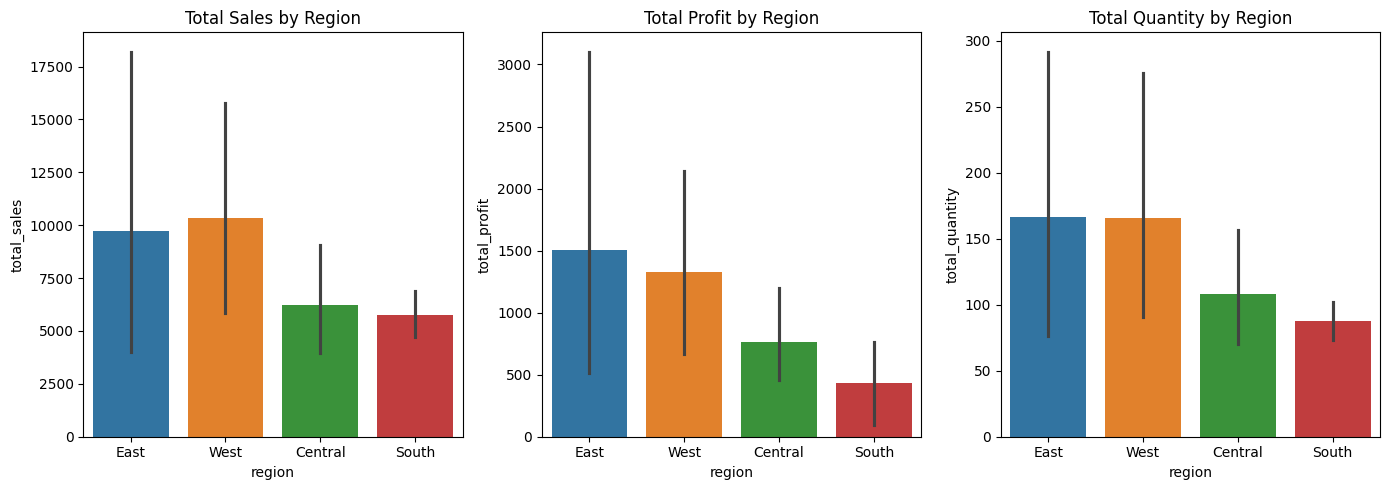

In [131]:
fig, axes = plt.subplots(1,3, figsize=(14,5))

sns.barplot(ax=axes[0], data=df, x='region', y='total_sales', hue='region', legend=False)
axes[0].set_title('Total Sales by Region')

sns.barplot(ax=axes[1], data=df, x='region', y='total_profit', hue='region', legend=False)
axes[1].set_title('Total Profit by Region')

sns.barplot(ax=axes[2], data=df, x='region', y='total_quantity', hue='region', legend=False)
axes[2].set_title('Total Quantity by Region')
plt.tight_layout()
plt.show()

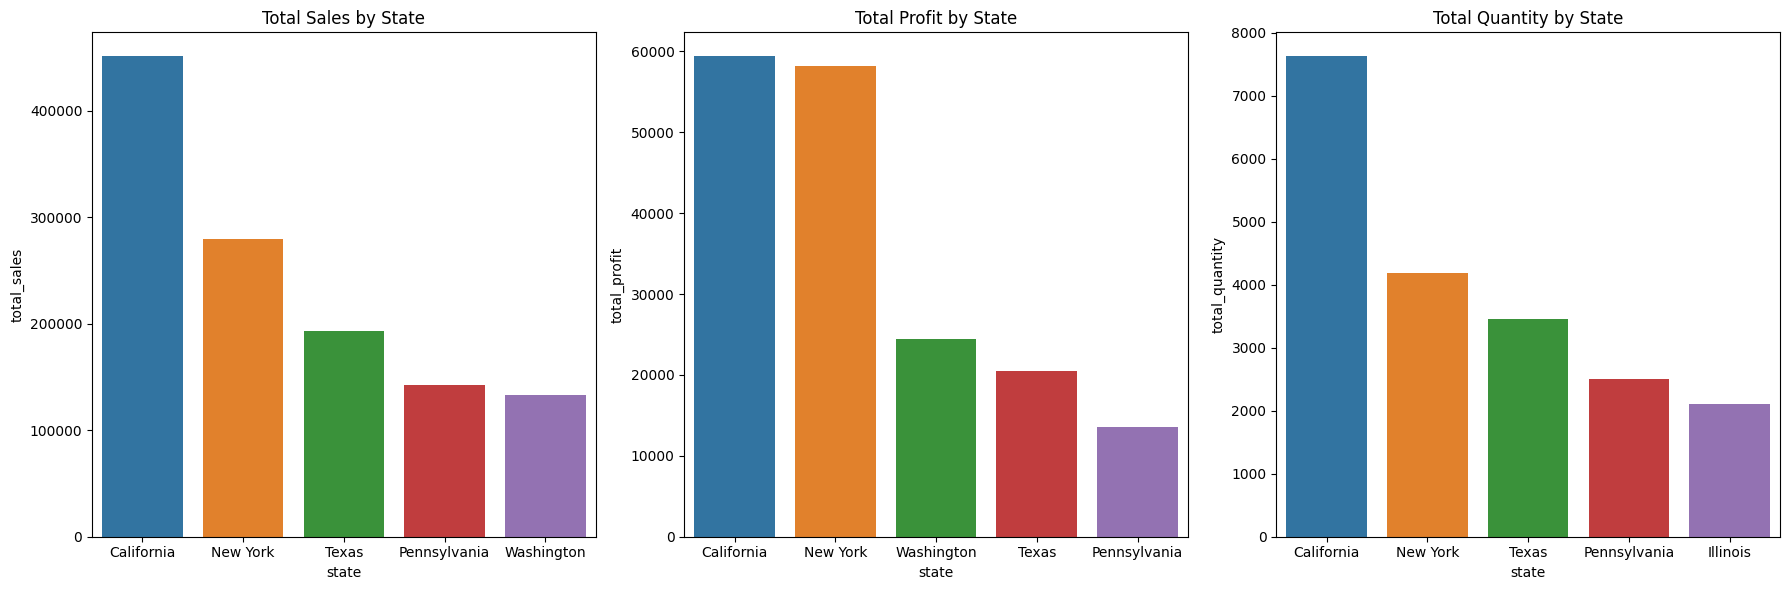

In [132]:
fig, axes = plt.subplots(1,3, figsize=(18,6))

sales_df['total_sales'] = pd.to_numeric(sales_df['total_sales'], errors='coerce')
profit_df['total_profit'] = pd.to_numeric(profit_df['total_profit'], errors='coerce')
quantity_df['total_quantity'] = pd.to_numeric(quantity_df['total_quantity'], errors='coerce')

top_sales_df = sales_df.nlargest(5, 'total_sales')
top_profit_df = profit_df.nlargest(5, 'total_profit')
top_quantity_df = quantity_df.nlargest(5, 'total_quantity')

sns.barplot(ax=axes[0], data=top_sales_df, x='state', y='total_sales', hue='state', legend=False)
axes[0].set_title('Total Sales by State')

sns.barplot(ax=axes[1], data=top_profit_df, x='state', y='total_profit', hue='state', legend=False)
axes[1].set_title('Total Profit by State')

sns.barplot(ax=axes[2], data=top_quantity_df, x='state', y='total_quantity', hue='state', legend=False)
axes[2].set_title('Total Quantity by State')
plt.tight_layout()
plt.show()

Purchase Patterns: Explore customer buying behavior, including order frequency, average sales value, and preferred products

In [133]:
query = '''
SELECT c.name, COUNT(o.order_key) AS order_frequency, AVG(s.sales) AS average_sales, p.name AS preferred_product
FROM customer c
    JOIN orders o ON c.customer_key = o.customer_key
    JOIN sales s ON o.order_key = s.order_key
    JOIN product p ON s.product_key = p.product_key
GROUP BY c.name, p.name
ORDER BY order_frequency DESC, average_sales DESC
'''
cursor.execute(query)

In [134]:
results = cursor.fetchall()
df = pd.DataFrame(results, columns=['customer_name', 'order_frequency', 'average_sales', 'preferred_product'])

df.head()

,customer_name,order_frequency,average_sales,preferred_product
0,Brian Moss,2,1088.76000000,Adjustable Depth Letter/Legal Cart
1,Yana Sorensen,2,1000.02000000,Letter Size Cart
2,Cassandra Brandow,2,945.89100000,"Hot File 7-Pocket, Floor Stand"
3,Joe Elijah,2,698.35200000,Global Executive Mid-Back Manager's Chair
4,Bart Pistole,2,510.82500000,Wi-Ex zBoost YX540 Cellular Phone Signal Booster


In [135]:
# TBD: Visualization

## Sales Analysis

Overall Performance: Track sales, profit, and quantity over time (year and month) to monitor trends and seasonality

Profitability: Assess profit margins across products, categories, and sub-categories to identify high-margin items

Discount Impact: Measure how discounts influence sales revenue and profit to optimize pricing strategies

## Product Analysis

Top Products: Rank products from most to least sold by quantity and revenue to highlight best-sellers

Category & Sub-category Performance: Evaluate revenue and sales by category and sub-category to identify strong-performing product groups

Product Trends: Detect seasonal or time-based trends in product demand for inventory and marketing planning

## Orders Analysis

Order Volume: Monitor the number of orders over time (year and month) to assess business growth and seasonality

Shipping Mode Performance: Evaluate sales, profit, and delivery efficiency across different shipping modes

Lead Time Analysis: Analyze the time between order and shipment and its impact on sales and customer satisfaction